Python + Google Colab: Algoritmalar ve Veri Yapıları Eğitimi (Sıfırdan İleriye)    
Bölüm 16: Python’da Görüntü İşleme Kütüphanesi (OpenCV)

Github Kaynagı:       
https://github.com/acetinkaya/Python-Google-Colab-Algoritmalar-ve-Veri-Yapilari-Egitimi --> D16

Öğr. Gör. Ali ÇETİNKAYA - 2025

In [ ]:
print("Merhaba, Python Veri Yapıları ve Algoritmalar / Bölüm 16")

Merhaba, Python Veri Yapıları ve Algoritmalar / Bölüm 16


In [ ]:
import sys  # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [ ]:
from google.colab import drive # google colab - drive bağlantısı

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/My Drive/VERIYAPILARI_PYTHON')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

/content/drive/My Drive/VERIYAPILARI_PYTHON


# Bölüm 16: Python’da Görüntü İşleme Kütüphanesi (OpenCV)

# OpenCV ( Open Source Computer Vision Library) Kütüphanesi Nedir?

Görüntü işleme, bilgisayarlı görü ve makine öğrenmesi uygulamalarında kullanılan açık kaynaklı bir kütüphanedir. Python, C++, Java ve MATLAB gibi birçok programlama dilini desteklemektedir.

# Python için "!pip install opencv-python" şeklinde kurulumunu gerçekleştirilmektedir.

# Temel OpenCV Fonksiyonları

cv2.imread() -> Görüntü Okuma işleminde

cv2.imshow() -> Görüntü gösterme işleminde

cv2.imwrite() -> Görüntü kaydetme işleminde

cv2.resize() -> Görüntü boyutlandırma işleminde

cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) -> Görüntüyü griye çevirme işleminde

# Görüntü İşlemede Gerçekleştirilen Operasyonlar

Gaussian Blur: Görüntüyü yumuşatma.

Thresholding: Görüntüyü ikili hale getirme.

Canny Edge Detection: Kenar bulma işlemleri.

# Web Kamerası ile Gerçekleştirilecek Görüntü İşleme Fonksiyonu

cv2.VideoCapture(0) -> ile webcam'den ankık görüntü alma.

In [ ]:
import cv2
import numpy as np

print("OpenCV Sürüm:", cv2.__version__)

OpenCV Sürüm: 4.11.0


In [ ]:
from google.colab.patches import cv2_imshow

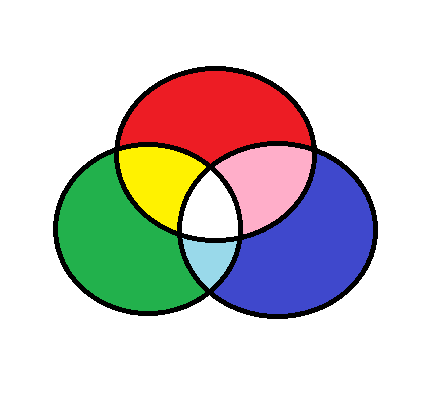

In [ ]:
image = cv2.imread('Opencv_ornekleri/renkli_resim.png')
cv2_imshow(image)

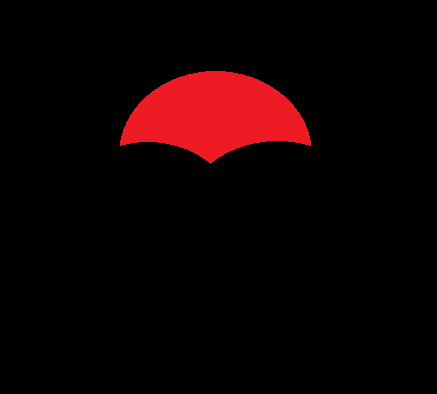

In [ ]:
lower_red = np.array([0, 0, 100]) # alt limit satırı
upper_red = np.array([100, 100, 255]) # üst limit satırı
mask = cv2.inRange(image, lower_red, upper_red)
result = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(result)

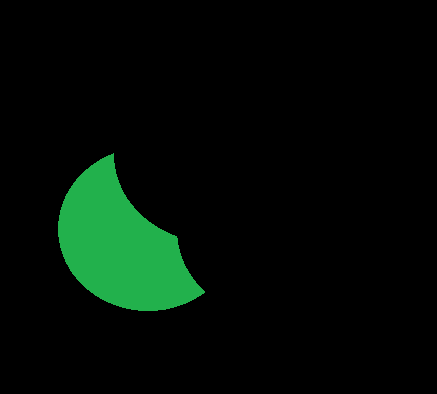

In [ ]:
lower_green = np.array([0, 100, 0]) # alt limit satırı
upper_green = np.array([100, 255, 100]) # üst limit satırı

mask1 = cv2.inRange(image, lower_green, upper_green)
result1 = cv2.bitwise_and(image, image, mask=mask1)
cv2_imshow(result1)

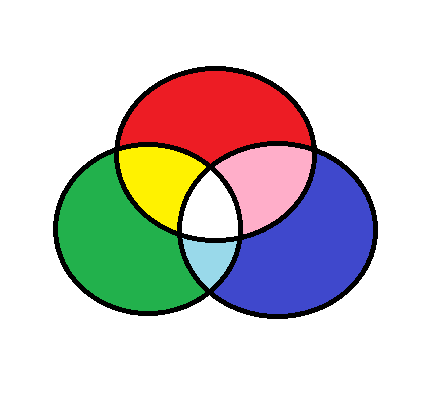

Resimdeki Renk Sayısı: 8


In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image_rgb.reshape((-1,3))
unique_colors = set()
for pixel in pixels:
  unique_colors.add(tuple(pixel))
num_unique_colors = len(unique_colors)

cv2_imshow(image)
print("Resimdeki Renk Sayısı:", num_unique_colors)

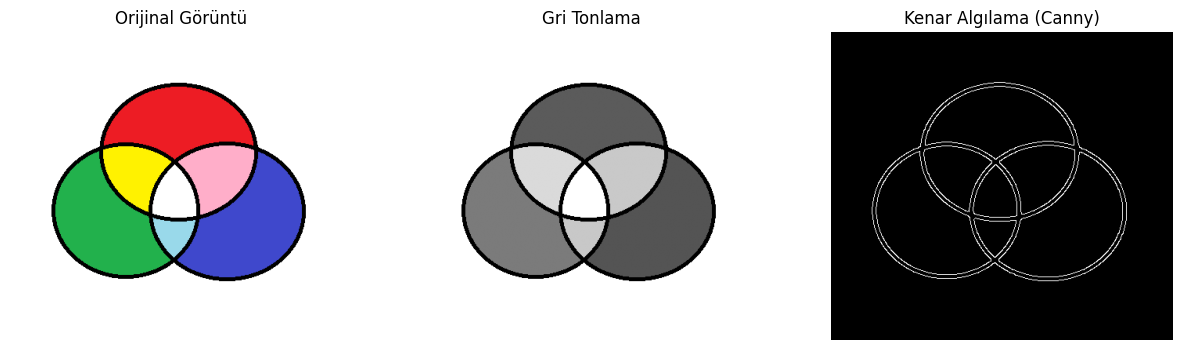

In [ ]:
# OpenCV ve Matplotlib kütüphanelerini yükleyelim
import cv2
import matplotlib.pyplot as plt

# 1. Görüntüyü belirli bir dosya yolundan oku
image = cv2.imread('Opencv_ornekleri/renkli_resim.png')

# Eğer resim doğru okunamadıysa kontrol et
if image is None:
    raise ValueError("Görsel bulunamadı! Lütfen dosya yolunu kontrol edin.")

# 2. Görüntüyü gri tonlamaya çevir
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Gürültüyü azaltmak için Gaussian Blur uygula
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# 4. Canny Edge Detection uygula
edges = cv2.Canny(blur, threshold1=50, threshold2=150)

# 5. Sonuçları göster
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Orijinal Görüntü")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Gri Tonlama")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Kenar Algılama (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()